# WORKING NOTEBOOK - JF
<br>

## Exploring MOVIE GROSS CSV

In [49]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('zippedData/bom.movie_gross.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'zippedData/bom.movie_gross.csv'

In [ ]:
df.info()

In [ ]:
#Seems like there are a lot fo null values in 'foreign_gross' column
#A few in 'studio' and 'doemstic_gross'

In [ ]:
df[df['domestic_gross'].isna()]

In [ ]:
df[df['foreign_gross'].isna()]

In [ ]:
df.sort_values(by='domestic_gross', ascending=False)

In [ ]:
df_studio_vc = df['studio'].value_counts()

In [ ]:
df_studio_vc.loc[df_studio_vc  20]

In [ ]:
#REPLACING NULL VALUES IN FOREIGN_GROSS WITH "0"?
#df['foreign_gross'] = df['foreign_gross'].fillna(0)
#df['foreign_gross']

In [ ]:
#CREATING NEW COLUMN TO DIFFERENTIATE BETWEEN MOVIES BETWEEN THAT AIRED ONLY DOMESTICALLY
#df['Foreign_Release'] = np.where(df['foreign_gross'] == 0, True, False)

# Merging the budget dataframe with the IMDB data pulled from SQL

In [5]:
#imports and connect to SQL
import pandas as pd
import sqlite3
import pandasql
import matplotlib.pyplot as plt


conn = sqlite3.connect('../zippedData/im.db')

In [6]:
#creating a dataframe with the info we want to take from the imdb database
imdb_ratings = pd.read_sql(
    """
    SELECT basics.movie_id, basics.primary_title, basics.original_title, basics.runtime_minutes, basics.genres, ratings.averagerating, ratings.numvotes
    FROM movie_basics as basics
        JOIN movie_ratings as ratings
            USING(movie_id)
    """, conn
)

In [7]:
budget_cleaned = pd.read_csv('../zippedData/success.csv')

In [8]:
#removing duplicates from the movie title column in each dataframe before merging them
imdb_ratings = imdb_ratings.drop_duplicates(subset=['primary_title'])
budget_cleaned = budget_cleaned.drop_duplicates(subset=['movie'])


In [9]:
all_movie_data = pd.merge(budget_cleaned, imdb_ratings, left_on='movie', right_on='primary_title', how='inner')


In [10]:
#duplicates sanity check
all_movie_data['movie'].duplicated().value_counts()

False    730
Name: movie, dtype: int64

# Production Budget EDA

In [11]:
all_movie_data

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes
0,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,8,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135
4,9,10,2015-11-06,Spectre,300000000,200074175,879620923,2.932070,2015,tt2379713,Spectre,Spectre,148.0,"Action,Adventure,Thriller",6.8,352504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,25.754942,2012,tt1742336,Your Sister's Sister,Your Sister's Sister,90.0,"Comedy,Drama",6.7,24780
726,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.564740,2015,tt2309260,The Gallows,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763
727,5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,27.697820,2017,tt6265828,A Ghost Story,A Ghost Story,92.0,"Drama,Fantasy,Romance",6.8,46280
728,5737,38,2016-03-18,Krisha,30000,144822,144822,4.827400,2016,tt4266638,Krisha,Krisha,83.0,Drama,7.2,5917


In [12]:
import numpy as np

In [13]:
df1 = all_movie_data

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            730 non-null    int64  
 1   id                    730 non-null    int64  
 2   release_date          730 non-null    object 
 3   movie                 730 non-null    object 
 4   production_budget     730 non-null    int64  
 5   domestic_gross        730 non-null    int64  
 6   worldwide_gross       730 non-null    int64  
 7   return_on_investment  730 non-null    float64
 8   year                  730 non-null    int64  
 9   movie_id              730 non-null    object 
 10  primary_title         730 non-null    object 
 11  original_title        730 non-null    object 
 12  runtime_minutes       725 non-null    float64
 13  genres                728 non-null    object 
 14  averagerating         730 non-null    float64
 15  numvotes              7

In [15]:
# create a list of our conditions
conditions = [
    (df1['production_budget'] <= 7500000),
    (df1['production_budget'] > 7500000) & (df1['production_budget'] <= 11000000),
    (df1['production_budget'] > 11000000) & (df1['production_budget'] <= 15000000),
    (df1['production_budget'] > 15000000) & (df1['production_budget'] < 100000000),
    (df1['production_budget'] > 100000000)]

# create a list of the values we want to assign for each condition
values = ['tier_1', 'tier_2', 'tier_3', 'tier_4', 'high_end']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['budget_tier'] = np.select(conditions, values)

# display updated DataFrame
df1

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,budget_tier
0,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624,high_end
1,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,high_end
2,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,high_end
3,8,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135,high_end
4,9,10,2015-11-06,Spectre,300000000,200074175,879620923,2.932070,2015,tt2379713,Spectre,Spectre,148.0,"Action,Adventure,Thriller",6.8,352504,high_end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,25.754942,2012,tt1742336,Your Sister's Sister,Your Sister's Sister,90.0,"Comedy,Drama",6.7,24780,tier_1
726,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.564740,2015,tt2309260,The Gallows,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763,tier_1
727,5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,27.697820,2017,tt6265828,A Ghost Story,A Ghost Story,92.0,"Drama,Fantasy,Romance",6.8,46280,tier_1
728,5737,38,2016-03-18,Krisha,30000,144822,144822,4.827400,2016,tt4266638,Krisha,Krisha,83.0,Drama,7.2,5917,tier_1


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            730 non-null    int64  
 1   id                    730 non-null    int64  
 2   release_date          730 non-null    object 
 3   movie                 730 non-null    object 
 4   production_budget     730 non-null    int64  
 5   domestic_gross        730 non-null    int64  
 6   worldwide_gross       730 non-null    int64  
 7   return_on_investment  730 non-null    float64
 8   year                  730 non-null    int64  
 9   movie_id              730 non-null    object 
 10  primary_title         730 non-null    object 
 11  original_title        730 non-null    object 
 12  runtime_minutes       725 non-null    float64
 13  genres                728 non-null    object 
 14  averagerating         730 non-null    float64
 15  numvotes              7

In [17]:
df1['budget_tier'].value_counts()

tier_4      328
tier_1      144
high_end    138
tier_3       57
tier_2       56
0             7
Name: budget_tier, dtype: int64

In [18]:
df_high_end = df1.loc[df1['budget_tier'] == 'high_end']
df_tier4 = df1.loc[df1['budget_tier'] == 'tier_4']
df_tier3 = df1.loc[df1['budget_tier'] == 'tier_3']
df_tier2 = df1.loc[df1['budget_tier'] == 'tier_2']
df_tier1 = df1.loc[df1['budget_tier'] == 'tier_1']

In [19]:
df_high_end['return_on_investment'].describe()

count    138.000000
mean       3.994879
std        1.525218
min        2.024848
25%        2.781272
50%        3.810594
75%        4.771426
max        8.483133
Name: return_on_investment, dtype: float64

In [20]:
df_tier4['return_on_investment'].describe()

count    328.000000
mean       4.580584
std        3.231242
min        2.007038
25%        2.585475
50%        3.410862
75%        5.019278
max       21.317558
Name: return_on_investment, dtype: float64

In [21]:
df_tier3['return_on_investment'].describe()

count    57.000000
mean      6.140129
std       4.492286
min       2.009261
25%       2.789445
50%       4.218249
75%       8.256579
max      25.597236
Name: return_on_investment, dtype: float64

In [38]:
df_tier2['return_on_investment'].describe()

count    56.000000
mean      6.561074
std       5.431786
min       2.121778
25%       3.056344
50%       5.169603
75%       7.812222
max      31.016276
Name: return_on_investment, dtype: float64

In [22]:
df_tier1['return_on_investment'].describe()

count    144.000000
mean      14.754210
std       36.599665
min        2.036410
25%        3.905315
50%        6.573900
75%       12.926531
max      416.564740
Name: return_on_investment, dtype: float64

In [39]:
df1.drop(df1[df1['return_on_investment'] == 416.564740].index, inplace = True)


In [40]:
highend_roi_mean = df1.loc[df1['budget_tier'] == 'high_end']['return_on_investment'].mean()
tier4_roi_mean = df1.loc[df1['budget_tier'] == 'tier_4']['return_on_investment'].mean()
tier3_roi_mean = df1.loc[df1['budget_tier'] == 'tier_3']['return_on_investment'].mean()
tier2_roi_mean = df1.loc[df1['budget_tier'] == 'tier_2']['return_on_investment'].mean()
tier1_roi_mean = df1.loc[df1['budget_tier'] == 'tier_1']['return_on_investment'].mean()
print(highend_roi_mean, tier4_roi_mean, tier3_roi_mean, tier2_roi_mean, tier1_roi_mean)

3.9948786892014794 4.580583749444087 6.140128627731488 6.561074429561309 11.944345775850316


In [41]:
#creating a new df for tier ROI means
tier_roi_means = {
    'Tiers':[5,4,3,2,1],
    'ROI_Mean':[highend_roi_mean, tier4_roi_mean, tier3_roi_mean, 
                 tier2_roi_mean, tier1_roi_mean]}
    
scatter_df = pd.DataFrame(tier_roi_means)
print(scatter_df)

   Tiers   ROI_Mean
0      5   3.994879
1      4   4.580584
2      3   6.140129
3      2   6.561074
4      1  11.944346


In [42]:
#plotting imports
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

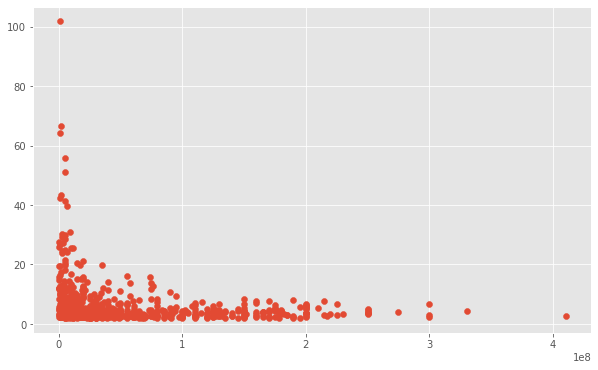

In [43]:
fix, ax = plt.subplots(figsize=(10,6))

ax.scatter(x='production_budget', y='return_on_investment', data=df1);

In [44]:
#find slope 'm'
def slope(x, y):
    rho = np.corrcoef(x, y)[0][1]
    s_y = y.std()
    s_x = x.std()

    m = rho * s_y / s_x
    return m
    
m = slope(df1['production_budget'], df1['return_on_investment'])

In [45]:
#find intercept 'c'
def intercept(m, x, y):
    y_mean = y.mean()
    x_mean = x.mean()

    # calculating intercept estimate
    c = y_mean - m * x_mean
    return c
    
c = intercept(m, df1['production_budget'], df1['return_on_investment'])

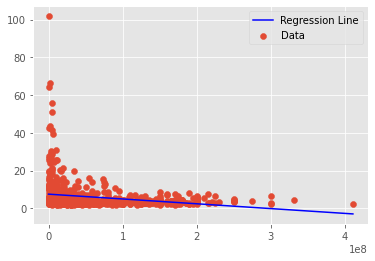

In [46]:
#Plotting the line
def best_fit(x, y):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x, y, label="Data")

    # Calculate coefficient and intercept
    m = slope(x, y)
    c = intercept(m, x, y)
    
    # Plot line created by coefficient and intercept
    regression_line = m * x + c
    ax.plot(x, regression_line, label= "Regression Line", color='blue')
    ax.legend()
    
best_fit(df1['production_budget'], df1['return_on_investment'])

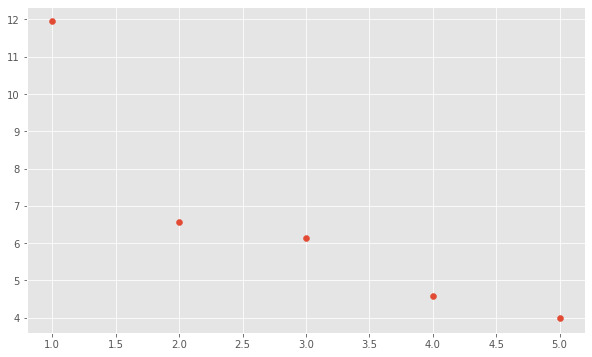

In [47]:
#using means inseatd of raw data
fix, ax = plt.subplots(figsize=(10,6))

ax.scatter(x='Tiers', y='ROI_Mean', data=scatter_df);

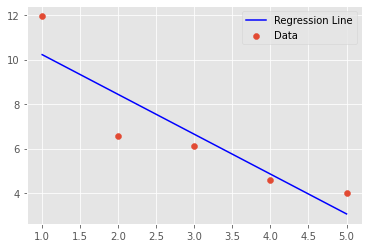

In [48]:
#Plotting the line
def best_fit(x, y):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x, y, label="Data")

    # Calculate coefficient and intercept
    m = slope(x, y)
    c = intercept(m, x, y)
    
    # Plot line created by coefficient and intercept
    regression_line = m * x + c
    ax.plot(x, regression_line, label= "Regression Line", color='red')
    ax.get_lines()[0].set_color("blue")
    ax.legend()
    
best_fit(scatter_df['Tiers'], scatter_df['ROI_Mean'])